# Code for my second projection - PCA

In [2]:
#importing the relevant library
import pandas as pd

#saving the preprocessed data in a dataframe
accom_df = pd.read_csv('Ethnic by tenure by acc.csv')
accom_df = accom_df.dropna()

In [3]:
#checking the top 5 rows
accom_df.head(5)


,Lower tier local authorities,Ethnic group,Accommodation type,Tenure of household,Observation
0,Hartlepool,"Asian, Asian British or Asian Welsh",Whole house or bungalow: Detached,Owned: Owns outright,137
1,Hartlepool,"Asian, Asian British or Asian Welsh",Whole house or bungalow: Detached,Owned: Owns with a mortgage or loan or shared ...,258
2,Hartlepool,"Asian, Asian British or Asian Welsh",Whole house or bungalow: Detached,Social rented: Rents from council or Local Aut...,20
3,Hartlepool,"Asian, Asian British or Asian Welsh",Whole house or bungalow: Detached,Social rented: Other social rented,11
4,Hartlepool,"Asian, Asian British or Asian Welsh",Whole house or bungalow: Detached,Private rented: Private landlord or letting ag...,44


In [4]:
#pivoting the dataframe to only include the relevant columns for the PCA 
pivot_accom = accom_df.pivot_table(index='Lower tier local authorities', columns='Accommodation type', values='Observation', aggfunc='mean')
pivot_accom = pivot_accom.reset_index()
pivot_accom.columns.name = None

In [6]:
#checking top 5 rows 
pivot_accom.head(5)

,Lower tier local authorities,A caravan or other mobile or temporary structure,"Flat, maisonette or apartment",Whole house or bungalow: Detached,Whole house or bungalow: Semi-detached,Whole house or bungalow: Terraced
0,Adur,21.764706,253.190476,334.000000,632.904762,364.750000
1,Allerdale,25.384615,132.277778,830.228571,872.205128,692.153846
2,Amber Valley,27.333333,130.333333,1318.243243,1143.190476,579.025000
3,Arun,75.300000,618.261905,1418.282051,1051.428571,821.214286
4,Ashfield,11.000000,169.459459,948.547619,1309.714286,598.975000


In [7]:
#importing relevant libraries
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [8]:
accom_areas = pivot_accom['Lower tier local authorities']
data = pivot_accom.drop('Lower tier local authorities', axis=1).to_numpy()

In [9]:
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_std)

In [11]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

In [12]:
pca_df['Lower tier local authorities'] = accom_areas

In [13]:
#checking the top 5 rows 
pca_df.head()

,PC1,PC2,Lower tier local authorities
0,-1.499967,-0.442099,Adur
1,-0.906033,0.012575,Allerdale
2,-0.558141,0.459174,Amber Valley
3,-0.157646,1.431821,Arun
4,-0.671533,-0.243007,Ashfield


In [14]:
#saving the PCA data to a csv file so that it can be used in Tableau - this code can be commented out
#pca_df.to_csv('PCA.csv', index=False)

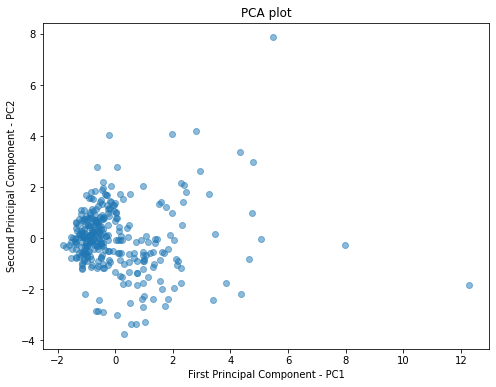

In [16]:
#importing matplotlib to create the plot 
import matplotlib.pyplot as plt
#saving the pca dataframe to only include the relevant data for the plot
pca_df = pd.DataFrame(data=pca_df, columns=['PC1', 'PC2'])

#plotting the PCA 
plt.figure(figsize=(8,6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA plot')
plt.xlabel('First Principal Component - PC1')
plt.ylabel('Second Principal Component - PC2')
plt.show()
